# GooglePlay Reviews Crawling 
 - 국민대학교 빅데이터 경영 MBA 5기 U2016054 이병준 
 - Summary
  - 우선 전체 평점 및 투표인원 데이터는 첫페이지 URL을 통해서 크롤링. 
  - 리뷰 : ajax 통신을 통한 크롤링.

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import requests
import urllib.request
import json
import requests
import re
from bs4 import BeautifulSoup

In [2]:
%matplotlib inline

## 1. 전체 평점 및 투표인원 
 - 첫페이지 내용 크롤링 

In [3]:
url = 'https://play.google.com/store/apps/details?id=com.bandainamcogames.dbzdokkanww&hl=ko'
headers = {'User-Agent': 'Mozilla/5.0 (Windows; U; MSIE 9.0; Windows NT 9.0; en-US)'}
req = urllib.request.Request(url, headers=headers)
data = urllib.request.urlopen(req).read().decode('utf-8')

In [4]:
bs = BeautifulSoup(data, 'html.parser')
div_list = bs.find_all('div',class_="details-section-body expandable")

div_root_list = bs.find_all('div',class_="details-wrapper apps")

 - 각 리뷰 스코오별 투표 인원 가지고 오기 
 - 1~5점 각 인원, 평균, 전체 인원 

In [5]:
# 각 리뷰 스코오별 투표 인원 가지고 오기 
# 1~5점 각 인원, 평균, 전체 인원 
for div_list in div_root_list:
    rating = div_list.find_all('div',class_="rating-box")
    if len(rating)>0:
        total_num = rating[0].find_all('span', class_="reviews-num")[0].text
        avg = rating[0].find_all("div",class_="score")[0].text
        score_detail = rating[0].find_all("div",class_="rating-histogram")[0].find_all('div',class_="rating-bar-container")
        total_number = {}
        for score in score_detail:
            label = score.find('span',class_="bar-label").text.strip()
            label_number = score.find('span',class_="bar-number").text
            total_number[label] = label_number
        total_number['avg'] = avg
        total_number['total'] = total_num

In [6]:
total_series = pd.Series(total_number)
total_series.to_csv("total_Dragonball_series.csv")

In [7]:
total_series

1         61,986
2         17,596
3         32,633
4         52,787
5        270,423
avg          4.0
total    435,425
dtype: object

## 2. 리뷰 전체 가지고 오기. 

In [8]:
url = "https://play.google.com/store/getreviews?authuser=0"
id = 'com.bandainamcogames.dbzdokkanww'
token = '9V4URdumbZesPVPwcfvK83ouELc:1492657163987'

In [9]:
# Review가지고오기.
def GetReviews(url,id,token,pages):  
    param = {'reviewType': '0', 'pageNum': '10000', 'id':'','reviewSortOrder':'4','xhr':'1','token':'','hl':'ko'}
    param['id'] = id
    param['token'] = token
    
    review_date_all = []
    review_star_all = []
    review_user_all = []
    review_title_all = []
    review_body_all = []
    for i in range(1,pages):
        param['pageNum'] = i
        res = requests.post(url, data=param)
        print(" line : {line}, code : {code}".format(line=i,code=res.status_code))
        if res.status_code == 400 or i == pages-1:
            review_df = pd.DataFrame({'DATE':review_date_all,'STAR':review_star_all,'TITLE':review_title_all, 'USER':review_user_all,'BODY':review_body_all})
            columns_list = ['DATE','USER','STAR','TITLE','BODY']
            return(review_df[columns_list])
        else:
            body = res.text[6:]
            res_json = json.loads(body)
            bs = BeautifulSoup(res_json[0][2], 'html.parser')
            review_lists = bs.find_all('div',class_="single-review")
            for j in range(1,len(review_lists)):
                review_date = review_lists[j].find('span',class_="review-date").text # review_date
                review_star = int(re.findall(r'\d+', review_lists[0].find('div',class_="tiny-star star-rating-non-editable-container")['aria-label'])[1]) # Get Digits from Rates
                review_title = review_lists[j].find('span',class_="review-title").text # title
                review_body = review_lists[j].find('div',class_="review-body with-review-wrapper").text # review body
                review_body = str.replace(review_body,review_title,"")
                review_body = str.replace(review_body,"전체 리뷰","")
                review_body = review_body.strip()
                review_user = review_lists[j].find('span',class_="author-name").text.strip()  # get Reviewer
                review_date_all.append(review_date)
                review_star_all.append(review_star)
                review_user_all.append(review_user)
                review_title_all.append(review_title)
                review_body_all.append(review_body)

In [10]:
DF = GetReviews(url,id,token,10000)

 line : 1, code : 200
 line : 2, code : 200
 line : 3, code : 200
 line : 4, code : 200
 line : 5, code : 200
 line : 6, code : 200
 line : 7, code : 200
 line : 8, code : 200
 line : 9, code : 200
 line : 10, code : 200
 line : 11, code : 200
 line : 12, code : 200
 line : 13, code : 200
 line : 14, code : 200
 line : 15, code : 200
 line : 16, code : 200
 line : 17, code : 200
 line : 18, code : 200
 line : 19, code : 200
 line : 20, code : 200
 line : 21, code : 200
 line : 22, code : 200
 line : 23, code : 200
 line : 24, code : 200
 line : 25, code : 200
 line : 26, code : 200
 line : 27, code : 200
 line : 28, code : 200
 line : 29, code : 200
 line : 30, code : 200
 line : 31, code : 200
 line : 32, code : 200
 line : 33, code : 200
 line : 34, code : 200
 line : 35, code : 200
 line : 36, code : 200
 line : 37, code : 200
 line : 38, code : 200
 line : 39, code : 200
 line : 40, code : 200
 line : 41, code : 200
 line : 42, code : 200
 line : 43, code : 200
 line : 44, code : 2

In [11]:
DF['DATE'] = pd.to_datetime(DF['DATE'],format='%Y년 %m월 %d일')
DF = DF.sort_values(by='DATE', ascending=True).reindex()   

In [12]:
DF.head()

,DATE,USER,STAR,TITLE,BODY
2551,2015-07-24,Mark Seo,5,가챠확률 개똥임,일본섭에서도 말 많은데..
3358,2015-07-26,sung kim,4,조아,
2550,2015-08-07,Sunwoo Lee,5,넘 재미있어요,캐릭터들 넘 멋있어서 모으는 재미도 있고 좋은거 뽑힐 확률도 다른게임들보다 더 높은...
2547,2015-08-25,Riot Omega,5,It's cool,Thanks to everyone who has been a bit more abo...
2549,2015-08-25,최민영,5,,can't update .....why!!!!!


In [13]:
DF.to_csv("Dragonball_review.csv")

## 3. 저평가를 준 사람들 리뷰 WordCloud
 - TextMining을 통한 WordCloud

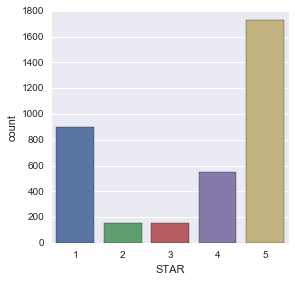

In [14]:
sns.factorplot('STAR',kind='count',data=DF) # 실질적으로 1을 준 사용자도 많다. 완전히 실망하거나 만족하거나 하는 성향을 보였다.

In [15]:
Under_three = DF[DF['STAR']<=3]
Over_three = DF[DF['STAR']>3]

In [16]:
len(Under_three) + len(Over_three)

3486

In [17]:
len(DF)

3486

In [18]:
under_text = Under_three['BODY']

In [20]:
under_text[100]

'정말재미잇어요'

In [22]:
re.sub('[^가-힣\s]',"",under_text[100])

'정말재미잇어요'

In [23]:
under_text = under_text.apply(lambda x:re.sub('[^가-힣\s]',"",x))

### 3.1 형태소 분석

In [24]:
from konlpy.tag import Twitter
from sklearn.feature_extraction.text import CountVectorizer

### 3.2 1글자 짜리 빼기

In [25]:
tagger = Twitter()

In [26]:
def get_word(doc):
    nouns = tagger.nouns(doc)
    return [noun for noun in nouns if len(noun) > 1]         

In [27]:
cv = CountVectorizer(tokenizer=get_word, max_features=200)
tdf = cv.fit_transform(under_text)
words = cv.get_feature_names()

In [28]:
words[:10]

['가요', '가지', '각성', '갑자기', '갤럭시', '게임', '겨우', '격전', '결제', '계속']

### 3.3 단어별 출현 빈도

In [29]:
import numpy as np 
count_mat = tdf.sum(axis=0)
count_mat

matrix([[  8,   8,  12,  13,   6, 208,   7,  15,   6,  67,  26,   8,   6,
           7,   7,   8,   8,  22,  32,   6,   6,  15,   7, 104,  10,  12,
           8,  40,  33,  45,   7,   8,   9,  54,   6,   8,  49,  14,   7,
          12, 148,   6,   7,   9,   8,   6,  21,  13,  15,  20,   6,   9,
           7,   7,   6,  10,   8,  19,  19,   7,  19,  29,   6,  12,   7,
           8,  61,  18,   9,  34,   8,  23,  10,   9,  13,  27,  19,  15,
           7,  20,  72,  12,   7,   8,  20,  16,  15,   6,   7,   7,   6,
           6,   6,   6,  20,  11,   7,  50,  14,  20,  14,   7,  10,  10,
          25,   6,   8,  12,  11,  21,  65,  13,  32,  15,   6,  53,   6,
           6,   6,  13,  24,   6,   9,  10,  32,   7,  12,   8,   9,   6,
           7,   6,  34,   6,  16,  10,   6,  15,  10,  31,   9,   6,  11,
          66,  20,  12,  19,  11,  16,  10,  12,  11,  10,   9,   8,  27,
           6,  48,  15,  16,  32,  15,   6,  30,   6,  19,  11,   8,  10,
           9,   7,  15,  25,  10,  39,

In [30]:
count = np.squeeze(np.asarray(count_mat))
word_count = list(zip(words, count))

In [31]:
word_count[:10]

[('가요', 8),
 ('가지', 8),
 ('각성', 12),
 ('갑자기', 13),
 ('갤럭시', 6),
 ('게임', 208),
 ('겨우', 7),
 ('격전', 15),
 ('결제', 6),
 ('계속', 67)]

### 3.4 빈도 정렬 

In [32]:
word_count = sorted(word_count, key=lambda t:t[1], reverse=True)

In [33]:
word_count[:5]

[('게임', 208), ('로딩', 148), ('너무', 104), ('시간', 72), ('계속', 67)]

In [34]:
# 20번 이상 언급됐던 부분만 나오게 하기 ( 내용이 너무 많다.)
word_count2 = []
for item in word_count:
    if item[1] > 20:
        word_count2.append(item)

### 3.5 WordCloud 생성

In [35]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

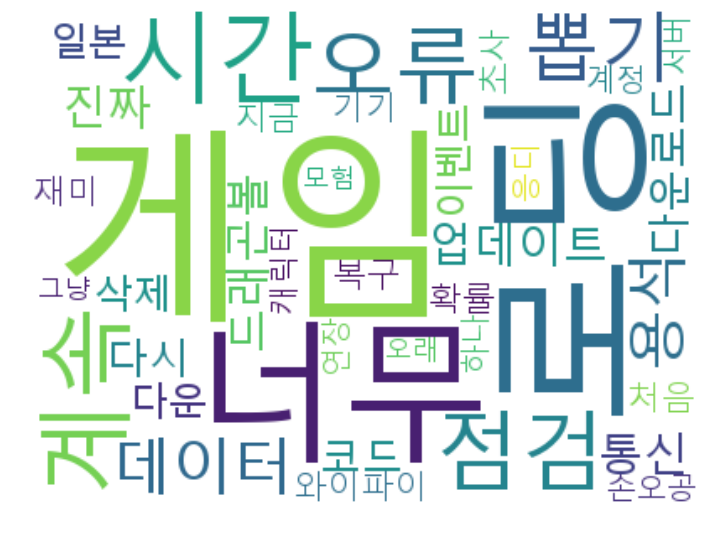

In [36]:
wc = WordCloud(font_path='C:\\Windows\\Fonts\\malgun.ttf', background_color='white', width=400, height=300)
cloud = wc.generate_from_frequencies(dict(word_count2))
plt.figure(figsize=(12,9))
plt.imshow(cloud)
plt.axis('off')
plt.show()